# Time series values for Rjúpnasalir pumpstation

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
df_pressure = pd.read_excel("data/H-KOP-RS-ÞS212.xlsx")
df_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure.head()



,start_time,value
0,2022-03-13 09:00:00,7.8
1,2022-03-14 23:00:00,7.8
2,2022-03-13 16:00:00,7.8
3,2022-03-08 02:00:00,7.8
4,2022-03-08 03:00:00,7.8


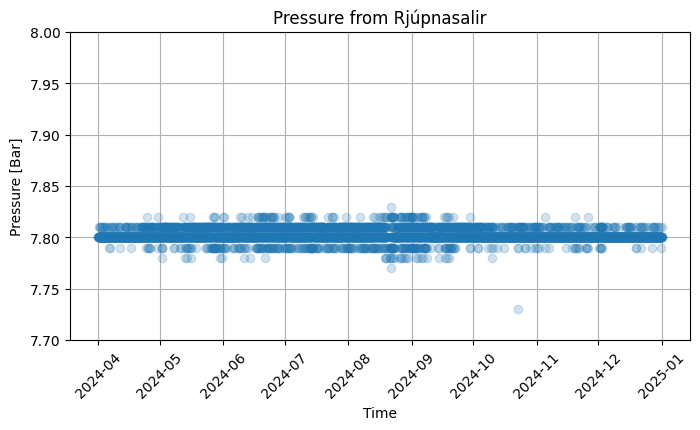

In [43]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for July 2024
df_filtered = df_pressure[(df_pressure['start_time'].dt.year == 2024) & (df_pressure['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered['start_time'], df_filtered['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([7.7, 8])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [44]:
df_flow = pd.read_excel("data/H-KOP-RS-RS212.xlsx")
df_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow.head()

,start_time,value
0,2022-03-13 09:00:00,68.39
1,2022-03-14 23:00:00,64.47
2,2022-03-13 16:00:00,64.36
3,2022-03-08 02:00:00,63.76
4,2022-03-08 03:00:00,62.39


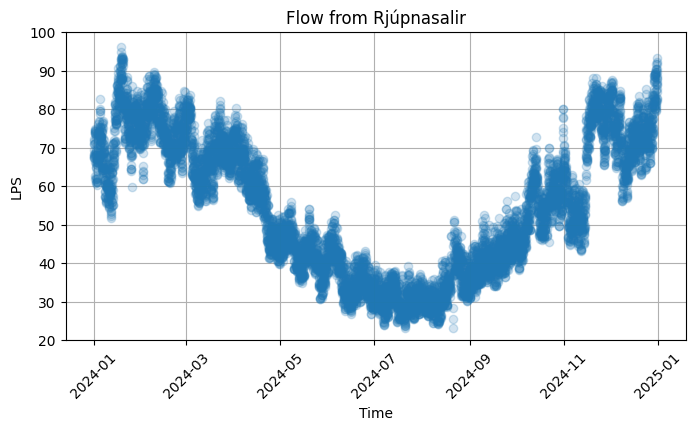

In [45]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for July 2024
df_filtered_flow = df_flow[(df_flow['start_time'].dt.year == 2024)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered_flow['start_time'], df_filtered_flow['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('LPS')
plt.title('Flow from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([20, 100])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [46]:
average_flow = df_filtered_flow['value'].mean()

# Print the average
print(f"The average flow is: {average_flow:.2f} LPS")

The average flow is: 54.29 LPS


## Prentum specific dag

In [47]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-11-03"
specific_day = "2024-11-04"


df_specific_day = df_flow[df_flow['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
23999 2024-11-04 23:00:00  47.76
24001 2024-11-04 20:00:00  57.04
24002 2024-11-04 22:00:00  51.43
24003 2024-11-04 21:00:00  53.72
24006 2024-11-04 06:00:00  49.47
24007 2024-11-04 01:00:00  46.77
24008 2024-11-04 04:00:00  45.97
24009 2024-11-04 05:00:00  45.77
24010 2024-11-04 02:00:00  46.75
24011 2024-11-04 03:00:00  46.40
24012 2024-11-04 07:00:00  55.54
24044 2024-11-04 14:00:00  48.14
24045 2024-11-04 12:00:00  49.32
24046 2024-11-04 11:00:00  49.95
24047 2024-11-04 10:00:00  50.19
24048 2024-11-04 13:00:00  49.43
24076 2024-11-04 19:00:00  58.77
24078 2024-11-04 08:00:00  50.74
24079 2024-11-04 09:00:00  50.29
24107 2024-11-04 15:00:00  49.07
24108 2024-11-04 17:00:00  54.02
24109 2024-11-04 16:00:00  51.06
24110 2024-11-04 18:00:00  57.15


In [48]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-04 01:00:00,46.77,0.923554
2024-11-04 02:00:00,46.75,0.923159
2024-11-04 03:00:00,46.40,0.916248
2024-11-04 04:00:00,45.97,0.907757
2024-11-04 05:00:00,45.77,0.903808
2024-11-04 06:00:00,49.47,0.976871
2024-11-04 07:00:00,55.54,1.096733
2024-11-04 08:00:00,50.74,1.001949
2024-11-04 09:00:00,50.29,0.993063


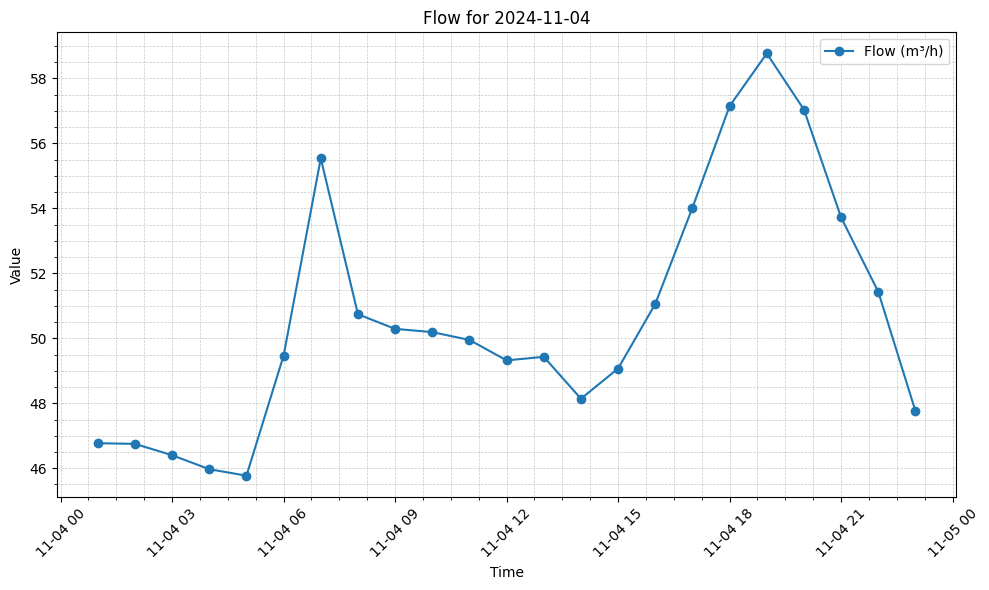

In [49]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m³/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow for {specific_day}')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

df_specific_day[['value']].to_csv('flow_values_specific_day.csv', index=True)


In [50]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')


df_specific_day = df_pressure[df_pressure['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
24000 2024-11-04 23:00:00   7.80
24002 2024-11-04 20:00:00   7.80
24003 2024-11-04 22:00:00   7.80
24004 2024-11-04 21:00:00   7.80
24007 2024-11-04 06:00:00   7.80
24008 2024-11-04 01:00:00   7.81
24009 2024-11-04 04:00:00   7.80
24010 2024-11-04 05:00:00   7.80
24011 2024-11-04 02:00:00   7.81
24012 2024-11-04 03:00:00   7.80
24013 2024-11-04 07:00:00   7.80
24045 2024-11-04 14:00:00   7.80
24046 2024-11-04 12:00:00   7.80
24047 2024-11-04 11:00:00   7.80
24048 2024-11-04 10:00:00   7.80
24049 2024-11-04 13:00:00   7.80
24077 2024-11-04 19:00:00   7.80
24079 2024-11-04 08:00:00   7.80
24080 2024-11-04 09:00:00   7.80
24107 2024-11-04 15:00:00   7.80
24108 2024-11-04 17:00:00   7.80
24109 2024-11-04 16:00:00   7.80
24110 2024-11-04 18:00:00   7.80


In [51]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_press = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_press  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-04 01:00:00,7.81,1.001170
2024-11-04 02:00:00,7.81,1.001170
2024-11-04 03:00:00,7.80,0.999889
2024-11-04 04:00:00,7.80,0.999889
2024-11-04 05:00:00,7.80,0.999889
2024-11-04 06:00:00,7.80,0.999889
2024-11-04 07:00:00,7.80,0.999889
2024-11-04 08:00:00,7.80,0.999889
2024-11-04 09:00:00,7.80,0.999889


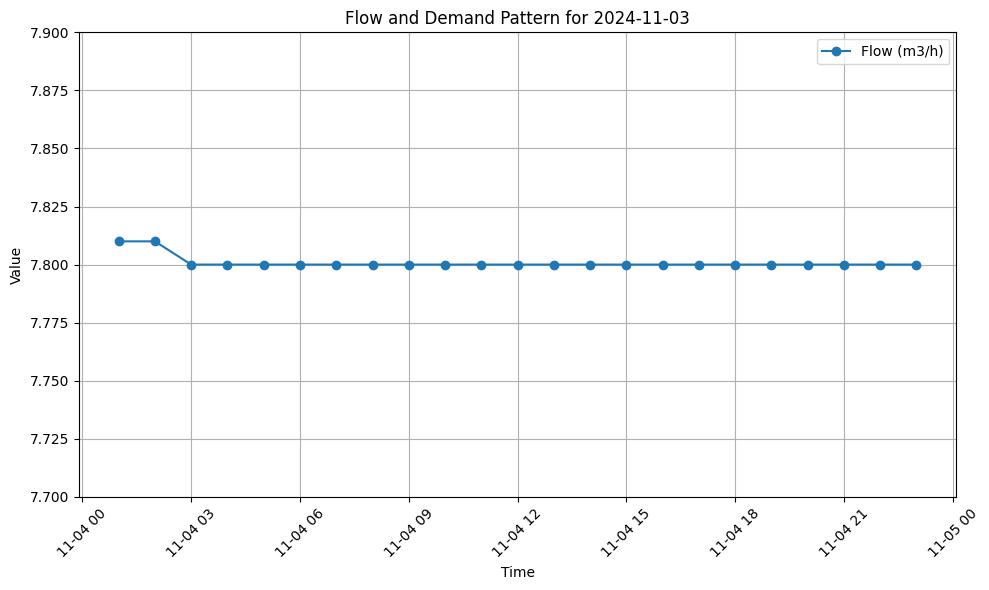

In [52]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow and Demand Pattern for 2024-11-03')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim([7.7 ,7.9])

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()